In [1]:
# 1.- Preparación del entorno
# Importa TensorFlow, necesario para construir y
# entrenar el modelo.
import tensorflow as tf

#para construir y entrenar el modelo.
from tensorflow.keras import layers, models

# para visualizar resultados.
import matplotlib.pyplot as plt

# para manejar arrays.
import numpy as np

# para interactuar con el sistema de archivos.
import os

# para dividir los datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# para cargar y procesar imágenes.
from PIL import Image

2025-07-27 22:08:15.648673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 2.- Primero, descargamos y descomprimimos el dataset desde Kaggle. 
# Luego, organizamos las imágenes en carpetas por clase 
# (por ejemplo: Shirt, Dress, Jeans, etc.).

# Define la ruta del dataset.
data_dir = './apparel-images-dataset'
# Verificamos que la ruta exista
print(data_dir)
current_dir = os.getcwd()
print("Directorio actual:", current_dir)
print(os.path.exists(data_dir))  # Should return True if the path is valid

# definimos las dimensiones con que se van a
# normalizar las imágenes, en pixeles.
# img_height, img_width = 128, 128
img_height, img_width = 96, 96
# definimos una función para cargar las imágenes.
def load_images(data_dir):
    # Inicializa dos listas vacías:
    images = []
    labels = []
    classes = os.listdir(data_dir)
    # Recorre las carpetas por clase (por ejemplo: Shirt, Dress).
    # Carga cada imagen, la convierte a RGB, 
    # la redimensiona a 128x128 y 
    # la guarda junto con su etiqueta.
    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                img = Image.open(img_path).convert('RGB').resize((img_width, img_height))
                # Convierte la imagen a un array NumPy y 
                # lo agrega a images.
                images.append(np.array(img))
                labels.append(label)
            except:
                continue
    # regresa un arreglo con imágenes y etiquetas
    return np.array(images), np.array(labels)
# cargamos las imágenes y etiquetas utilizando la 
# función recien definida.
# Carga todas las imágenes y etiquetas en memoria.
images, labels = load_images(data_dir)


./apparel-images-dataset
Directorio actual: /home/784415da-63f5-445e-ab26-1e7f31e326b5
True


In [3]:
# 3. División en entrenamiento y prueba
from sklearn.preprocessing import LabelEncoder

# conviertimos las etiquetas de texto en números enteros.
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
# Separaramos el 20% de los datos para prueba.
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42
    # El parámetro random_state en train_test_split 
    # controla la aleatoriedad de la división de datos. 
    # Usar un valor fijo como 42 garantiza que:
    # La división entre entrenamiento y prueba siempre 
    # sea la misma cada vez que se ejecute el código.
    # Esto permite reproducibilidad.
    )

# escalamos los valores de píxeles de 0–255 a 
# valores entre 0–1,lo que ayuda al modelo a
# entrenar más eficientemente.
X_train = X_train / 255.0
X_test = X_test / 255.0


In [4]:
# 4. Construcción del modelo
# from tensorflow.keras import layers, models
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
]

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(labels_encoded)), activation='softmax')
])



# Compilación con optimizador ajustado
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


# Define a sequential CNN model for image classification
#model = models.Sequential([
    # First convolutional layer with 16 filters of size 3x3, ReLU activation
    # Input shape specifies the dimensions of our images (height, width, channels)
    #layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    # Max pooling layer to reduce spatial dimensions by half (2x2 pooling)
    #layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 32 filters of size 3x3, ReLU activation
    #layers.Conv2D(32, (3, 3), activation='relu'),
    # Another max pooling layer to further reduce dimensions
    #layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to 1D for the dense layers
    #layers.Flatten(),
    # Dropout layer with 30% rate to prevent overfitting during training
    #layers.Dropout(0.3),  # Reduce overfitting sin añadir parámetros
    # Dense hidden layer with 64 neurons and ReLU activation
    #layers.Dense(64, activation='relu'),
    # Output layer with neurons equal to number of classes, softmax for probability distribution
    #layers.Dense(len(le.classes_), activation='softmax')
#])

#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

#model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 45, 45, 64)       2

2025-07-27 22:09:50.105296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-27 22:09:50.108795: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
# 5. Entrenamiento del modelo
# history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)


In [6]:
# 5. Entrenamiento del modelo
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    # callbacks=[early_stop]
    callbacks=callbacks
)


Epoch 1/30
228/228 [==============================] - 99s 428ms/step - loss: 2.4263 - accuracy: 0.3133 - val_loss: 11.0860 - val_accuracy: 0.1147 - lr: 5.0000e-04
Epoch 2/30
228/228 [==============================] - 97s 425ms/step - loss: 1.7025 - accuracy: 0.4916 - val_loss: 2.1405 - val_accuracy: 0.4566 - lr: 5.0000e-04
Epoch 3/30
228/228 [==============================] - 97s 428ms/step - loss: 1.4405 - accuracy: 0.5723 - val_loss: 1.0977 - val_accuracy: 0.6701 - lr: 5.0000e-04
Epoch 4/30
228/228 [==============================] - 100s 437ms/step - loss: 1.2080 - accuracy: 0.6364 - val_loss: 1.3758 - val_accuracy: 0.5889 - lr: 5.0000e-04
Epoch 5/30
228/228 [==============================] - 104s 456ms/step - loss: 1.0710 - accuracy: 0.6725 - val_loss: 0.8088 - val_accuracy: 0.7640 - lr: 5.0000e-04
Epoch 6/30
228/228 [==============================] - 97s 425ms/step - loss: 0.9557 - accuracy: 0.7060 - val_loss: 0.8793 - val_accuracy: 0.7816 - lr: 5.0000e-04
Epoch 7/30
228/228 [=====

In [7]:
# 6. Evaluación del modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')


72/72 [==============================] - 6s 82ms/step - loss: 0.4197 - accuracy: 0.8863
Precisión en el conjunto de prueba: 0.89


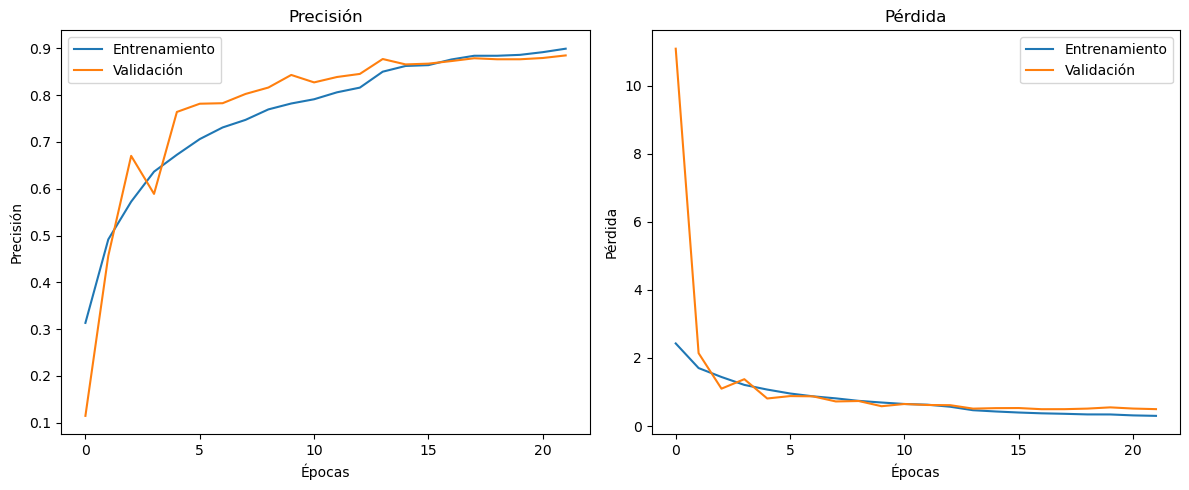

In [8]:
# 7. Visualización del rendimiento
plt.figure(figsize=(12, 5))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()




72/72 [==============================] - 5s 67ms/step


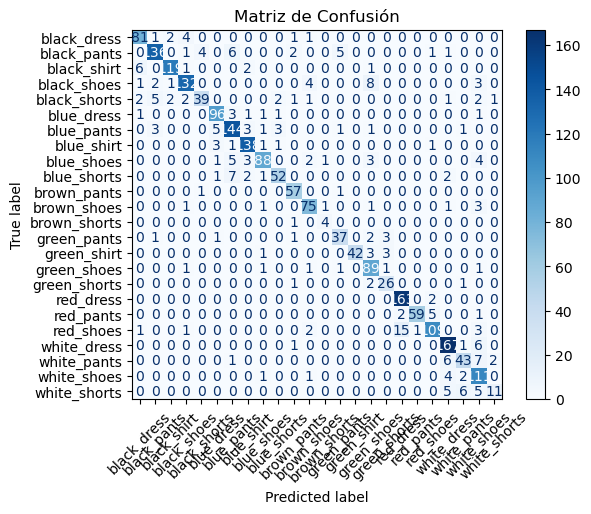

In [10]:
# Matriz de confusión
# Para evaluar el rendimiento por clase:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Matriz de Confusión')
plt.show()

